## One Dimension Optimisation illustration 

In [1]:
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import animation

In [2]:
Nbit = 15
#f = lambda x: abs(x * np.sin(0.01 * x) + 0.5* x * np.sin(0.02 * x))
f = lambda x: abs(x * np.sin(x/2000) + 0.5 * x * np.sin(x/5000))
# x = np.arange(2**Nbit)
# plt.plot(x, f(x))
# plt.show()

In [3]:
N_population = 16
R_mutation = 0.05
N_iteration = 100

fitness = f
x_random = lambda: np.random.randint(2**Nbit)

population = np.array([x_random() for i in range(N_population)])

def next_generation(population):
    
    fitness_list = np.array(list(map(fitness, population)))
    p_mating = fitness_list/sum(fitness_list)
    
    new_population = []
    
    n_mating = int(len(population)/2)
    for i in range(n_mating):
        # Allow self-production
        parent1, parent2 = np.random.choice(population, size=2, p=p_mating)
        crossover_point = np.random.randint(Nbit)
        
        parent1_a = parent1 & (2**Nbit - 2**crossover_point)
        parent1_b = parent1 & (2**crossover_point - 1)
        parent2_a = parent2 & (2**Nbit - 2**crossover_point)
        parent2_b = parent2 & (2**crossover_point - 1)
        
        
        offspring1 = parent1_a + parent2_b
        offspring2 = parent1_b + parent2_a

        if np.random.random() < R_mutation:
            position_bit = 2 ** np.random.randint(Nbit)
            offspring1 = offspring1 ^ position_bit
        if np.random.random() < R_mutation:
            position_bit = 2 ** np.random.randint(Nbit)
            offspring2 = offspring2 ^ position_bit

        new_population += [offspring1, offspring2]
        
    return new_population

In [4]:
pop_all = []
for i in range(N_iteration):
    population = next_generation(population)
    pop_all += [population]

<IPython.core.display.Javascript object>


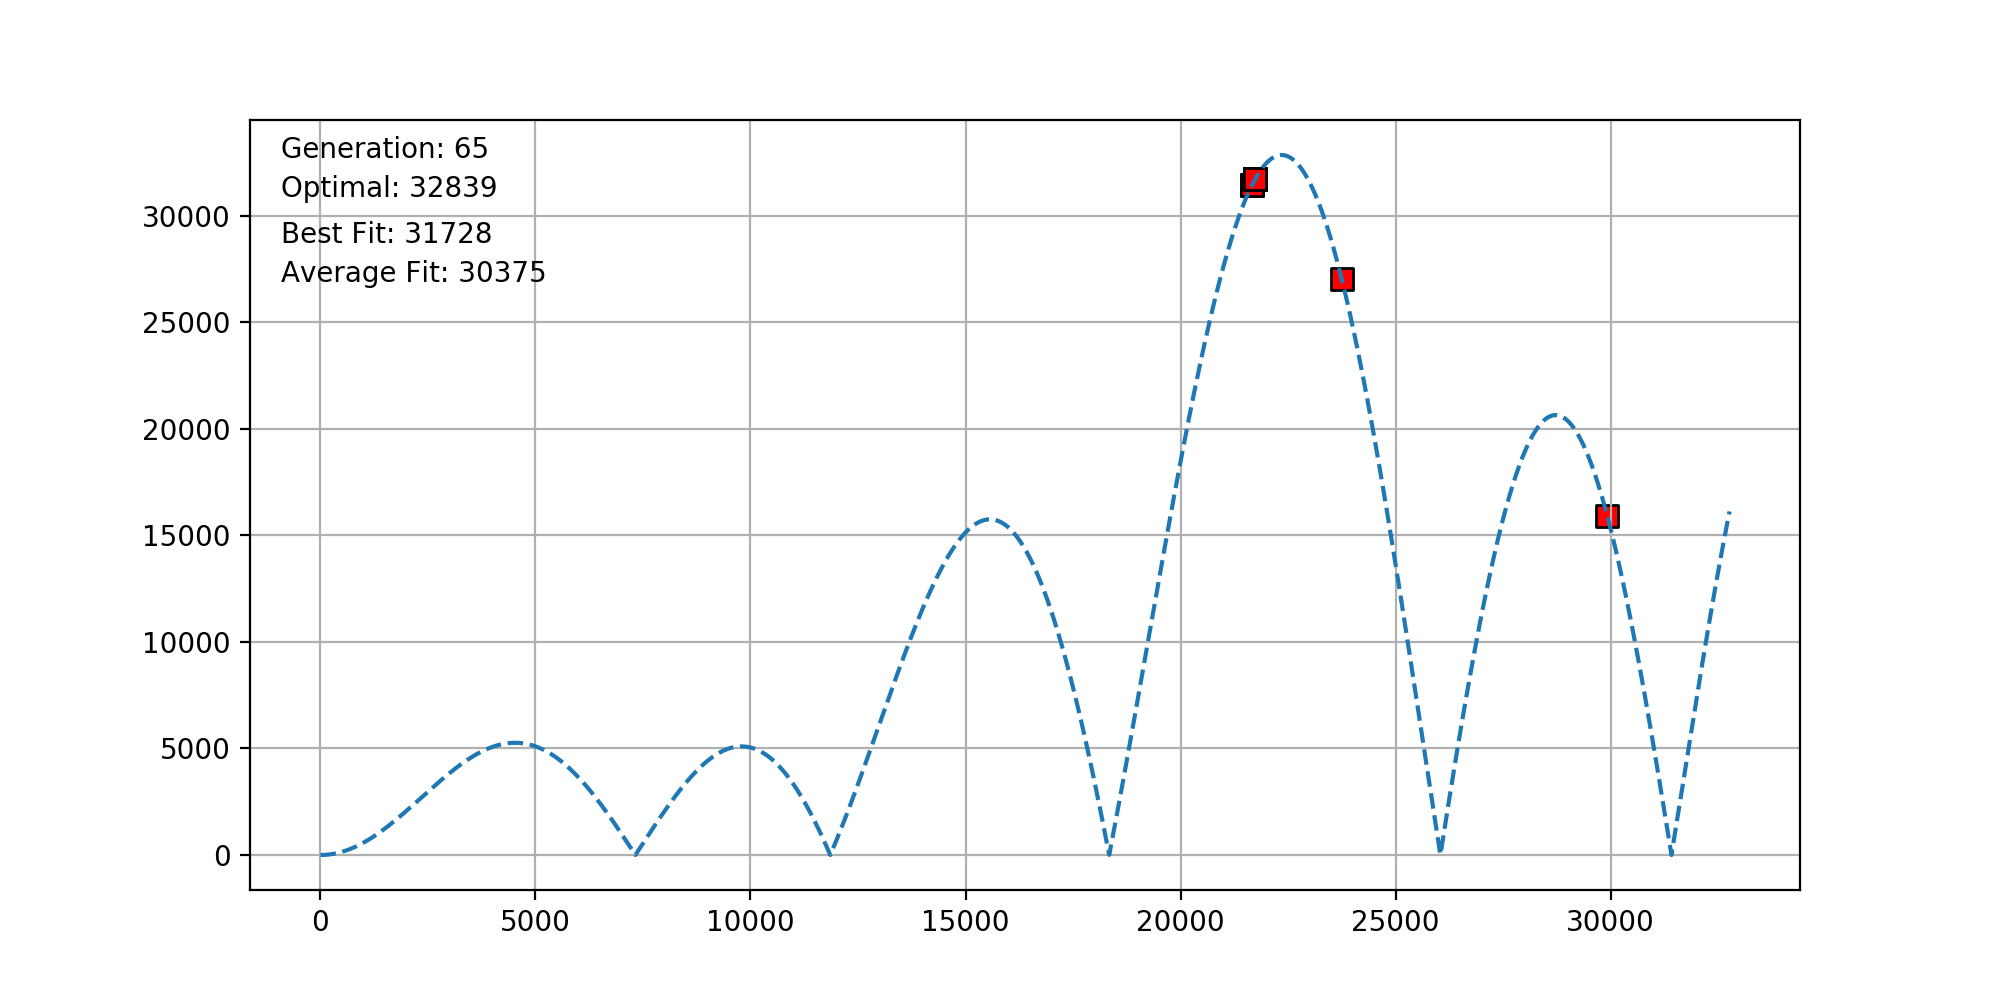

In [5]:
xl = np.arange(2 ** Nbit)
yl = [f(v) for v in xl]
yopt=max(yl)

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(xlim=(0, 2 ** Nbit))
ax.plot(xl, yl, '--')

# animation function.  This is called sequentially
def animate(i):
    x = pop_all[i]
    y = [f(v) for v in x]
    ax.clear()
    ax.plot(xl, yl, '--')
    
    ax.text(0.02, 0.95, 'Generation: %d' %i, transform=ax.transAxes)
    ax.text(0.02, 0.90, 'Optimal: %d' %yopt, transform=ax.transAxes)
    ax.text(0.02, 0.84,'Best Fit: %d' %max(y), transform=ax.transAxes)
    ax.text(0.02, 0.79, 'Average Fit: %d' %np.mean(y), transform=ax.transAxes)
    ax.grid()
    
    ax.scatter(x, y, color='r', marker='s', s=60, edgecolors='k')

anim = animation.FuncAnimation(fig, animate, frames=N_iteration, interval=500, blit=True)

plt.show()